In [1]:
from netpyne import specs, sim
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import neuron
import netpyne
import sys
import os
from os.path import join

In [2]:
# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

## Cell parameters
netParams.cellParams['pyr'] = {
    'secs': {
        'soma': {
            'geom': {
                'diam': 20.0,   
                'L': 20.0, 
                'Ra': 123.0},
            'mechs': {
                'hh': {
                    'gnabar': 0.12, 
                    'gkbar': 0.036, 
                    'gl': 0.0003, 
                    'el': -70}
            }
        },
        'dend1': {
            'geom': {
                'diam': 5.0, 
                'L': 75.0, 
                'Ra': 150.0, 
                'cm': 1
            }, 
            'mechs' :{
                'pas':{
                    'g': 0.0000357, 
                    'e': -70}
            },
            'topol' : {
                'parentSec': 'soma', 
                'parentX': 1.0, 
                'childX': 0
                }
        },
        'dend2': {
            'geom': {
                'diam': 5.0, 
                'L': 75.0, 
                'Ra': 150.0, 
                'cm': 1
            }, 
            'mechs' :{
                'pas':{
                    'g': 0.0000357, 
                    'e': -70}
            },
            'topol' : {
                'parentSec': 'dend1', 
                'parentX': 1.0, 
                'childX': 0
                }            
        }
    }
    # , "pt3d": True,
}

## Population parameters
# pyr_positions = [[x , y , 0] for x in range(100,1100,300) for y in range(100,1100,300)]
pyr_positions = [[x , x , 0] for x in range(100,1100,300)]
cellsList = [{'x': x, 'y': y, 'z': z} for x,y,z in pyr_positions]
netParams.popParams['E'] = {'cellType': 'pyr', 'cellsList': cellsList}
# netParams.popParams['E'] = { #xyzRange = [0, 100]
#     'cellType': 'pyr', 
#     'numCells': 10}

## Synaptic mechanism parameters
netParams.synMechParams['exc'] = {
    'mod': 'Exp2Syn', 
    'tau1': 0.2, 
    'tau2': 5.0, 
    'e': 0}  # excitatory synaptic mechanism

# Stimulation parameters
netParams.stimSourceParams['bkg'] = {
    'type': 'NetStim', 
    'rate': 50, #hz 
    'noise': 1.0}

netParams.stimTargetParams['bkg->E'] = {
    'source': 'bkg', 
    'conds': {'pop': 'E'}, 
    'weight': 0.00005, 
    'delay': 1000,
    'synMech': 'exc'}

netParams.sizeX = 10
netParams.sizeY = 1000
netParams.sizeZ = 10

simConfig = specs.SimConfig()       # object of class SimConfig to store simulation configuration



In [3]:
# #------------------------------------------------------------------------------
# #  extracellular mechs
# #------------------------------------------------------------------------------
for celltyp in netParams.cellParams.keys():
    label = []
    for secname in netParams.cellParams[celltyp]['secs'].keys():
        netParams.cellParams[celltyp]['secs'][secname]['mechs']['extracellular'] = {}


In [4]:
# Simulation options

simConfig.hParams = {'celsius': 34, 'v_init': -72.5}  
simConfig.duration = 2000          # Duration of the simulation, in ms
simConfig.dt = 0.01                # Internal integration timestep to use
simConfig.verbose = False           # Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'},
                         'V_dend1':{'sec':'dend1','loc':0.5,'var':'v'},
                         'V_dend2':{'sec':'dend2','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordCells = ['E']
simConfig.recordStep = 0.1          # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = 'raster'  # Set file output name
simConfig.saveJson = False

simConfig.analysis['plotTraces'] = {'include': ['E'], 'figSize': (12, 4), 'saveFig': False, 'overlay': True, 'oneFigPer': 'cell'}  # Plot recorded traces for this list of cells
# simConfig.analysis['plotRaster'] = {'showFig': True}                  # Plot a raster
# simConfig.analysis['plotSpikeHist'] = {'include': ['E'], 'showFig': True}

# Create network and run simulation
# sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)    

In [5]:
sim.initialize(
    simConfig = simConfig, 	
    netParams = netParams)  				# create network object and set cfg and net params
sim.net.createPops()               			# instantiate network populations
sim.net.createCells()              			# instantiate network cells based on defined populations
sim.net.defineCellShapes()  # in case some cells had stylized morphologies without 3d pts
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)


Start time:  2024-04-12 19:38:38.839754

Creating network of 1 cell populations on 1 hosts...
  Number of cells on node 0: 4 
  Done; cell creation time = 0.00 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Number of stims on node 0: 4 
  Done; cell stims creation time = 0.00 s.
Recording 12 traces of 3 types on node 0


{spkt: Vector[0], spkid: Vector[1], V_soma: {cell_0: Vector[14], cell_1: Vector[17], cell_2: Vector[20], cell_3: Vector[23]}, V_dend1: {cell_0: Vector[15], cell_1: Vector[18], cell_2: Vector[21], cell_3: Vector[24]}, V_dend2: {cell_0: Vector[16], cell_1: Vector[19], cell_2: Vector[22], cell_3: Vector[25]}, t: Vector[26], _repr_mimebundle_: {}}


 {'cellType': 'pyr', 'pop': 'E', 'x': 100, 'y': 100, 'z': 0, 'xnorm': 10.0, 'ynorm': 0.1, 'znorm': 0.0, 'label': ['pyr']}
['soma', 'dend1', 'dend2']
soma 0
dend1 1
dend2 2

 {'cellType': 'pyr', 'pop': 'E', 'x': 400, 'y': 400, 'z': 0, 'xnorm': 40.0, 'ynorm': 0.4, 'znorm': 0.0, 'label': ['pyr']}
['soma', 'dend1', 'dend2']
soma 0
dend1 1
dend2 2

 {'cellType': 'pyr', 'pop': 'E', 'x': 700, 'y': 700, 'z': 0, 'xnorm': 70.0, 'ynorm': 0.7, 'znorm': 0.0, 'label': ['pyr']}
['soma', 'dend1', 'dend2']
soma 0
dend1 1
dend2 2

 {'cellType': 'pyr', 'pop': 'E', 'x': 1000, 'y': 1000, 'z': 0, 'xnorm': 100.0, 'ynorm': 1.0, 'znorm': 0.0, 'label': ['pyr']}
['soma', 'dend1', 'dend2']
soma 0
dend1 1
dend2 2

Running simulation using NEURON for 2000.0 ms...
  Done; run time = 1.59 s; real-time ratio: 1.26.

Gathering data...
  Done; gather time = 0.01 s.

Analyzing...
  Cells: 4
  Connections: 4 (1.00 per cell)
  Spikes: 0 (0.00 Hz)
  Simulated time: 2.0 s; 1 workers
  Run time: 1.59 s
Plotting recorded cell

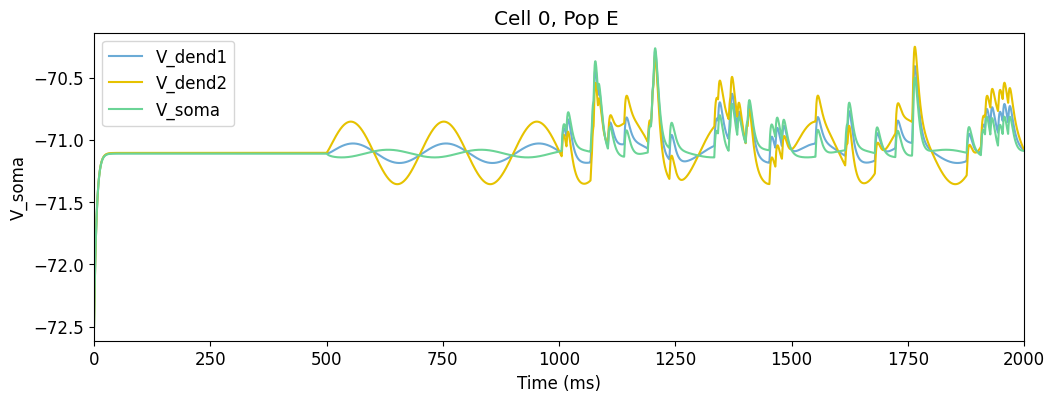

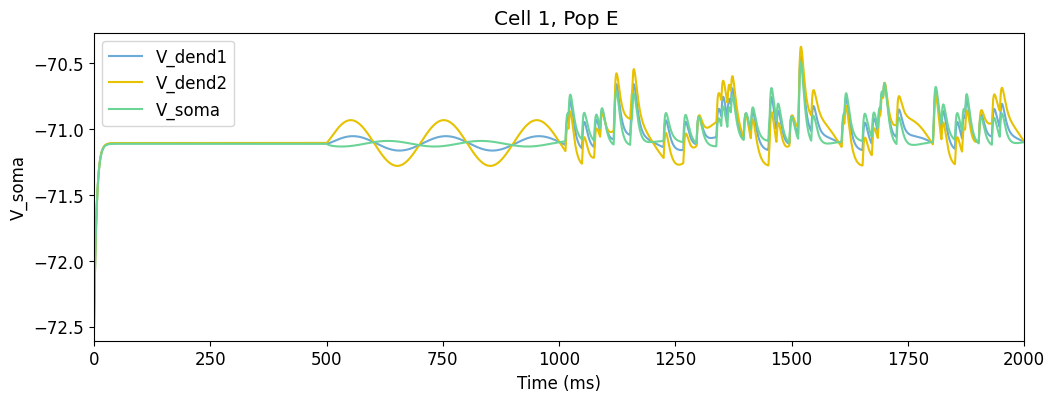

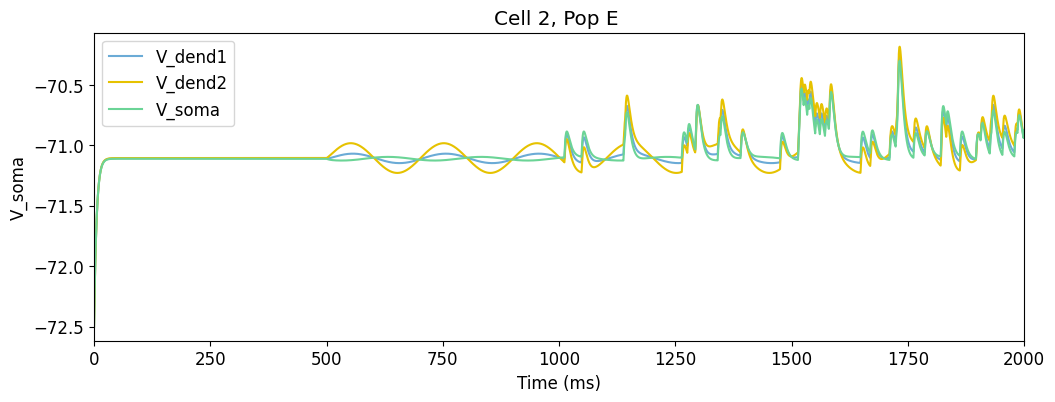

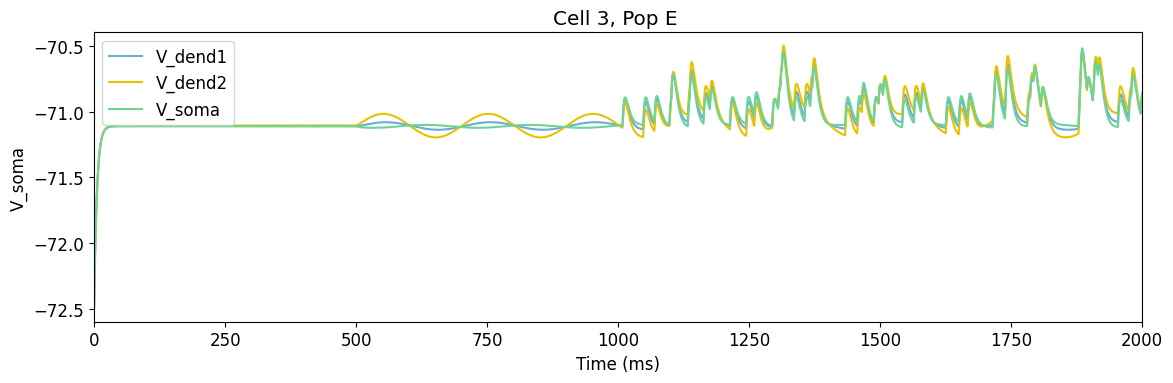

  Done; plotting time = 0.76 s

Total time = 2.44 s
Plotting 3D cell shape ...


(<Figure size 640x480 with 1 Axes>, {})

In [6]:
def collect_pt3d(self, section):
        """        collect the pt3d info, for each section
        """
        for sec in [sec for secName, sec in self.secs.items() if section in secName]:
            sec['hObj'].push()
            n3d = int(neuron.h.n3d())  # get number of n3d points in each section
            x3d_i, y3d_i, z3d_i, diam3d_i, arc3d_i = np.zeros((5, n3d))
            for i in range(n3d):
                x3d_i[i] = neuron.h.x3d(i)
                y3d_i[i] = neuron.h.y3d(i)
                z3d_i[i] = neuron.h.z3d(i)
                diam3d_i[i] = neuron.h.diam3d(i)
                arc3d_i[i] = neuron.h.arc3d(i)

        return x3d_i, y3d_i, z3d_i, diam3d_i, arc3d_i

def getSecsPos(self, secList):
        """        Get Secs position
        """
        x3d, y3d, z3d, diam3d, arc3d = [], [], [], [], []
        
        for secName in secList:
            # print(secName)
            x3d_i, y3d_i, z3d_i, diam3d_i, arc3d_i = collect_pt3d(self, secName)
            
            x3d.append(x3d_i)
            y3d.append(y3d_i)
            z3d.append(z3d_i)
            diam3d.append(diam3d_i)
            arc3d.append(arc3d_i)

        return x3d, y3d, z3d, diam3d, arc3d

def insert_v_ext(self, v_ext, t_ext):

    self.t_ext = neuron.h.Vector(t_ext)
    self.v_ext = []
    for v in v_ext:
        self.v_ext.append(neuron.h.Vector(v))
    
    # play v_ext into e_extracellular reference
    i = 0
    for secName, sec in self.secs.items(): 
        print(secName,i)
        self.v_ext[i].play(sec['hObj'](0.5)._ref_e_extracellular, self.t_ext)
        i += 1
        
        # # LFPy
        # i = 0
        # for sec in self.allseclist:
        #     for seg in sec:
        #         self.v_ext[i].play(seg._ref_e_extracellular, self.t_ext)
        #         i += 1
  
def make_extracellular_stimuli(acs_params, self, secList):
    """ Function to calculate and apply external potential """
    x0, y0, z0 = acs_params['position']
    ext_field = np.vectorize(lambda x, y, z: 1 / (4 * np.pi *
                                                  (acs_params['sigma'] * 
                                                   np.sqrt((x0 - x)**2 + (y0 - y)**2 + (z0 - z)**2) + skull_attenuation)))

    stimstart = acs_params['stimstart']
    stimend = acs_params['stimend']
    stimdif = stimend-stimstart

    # MAKING THE EXTERNAL FIELD
    n_tsteps = int(stimdif / simConfig.dt + 1)
    n_start = int(stimstart/simConfig.dt)
    n_end = int(stimend/simConfig.dt + 1)
    t = np.arange(start=n_start, stop=n_end) * simConfig.dt
    pulse = acs_params['amp'] * 1000. * \
        np.sin(2 * np.pi * acs_params['frequency'] * t / 1000)

    totnsegs = len(secList)    
    v_cell_ext = np.zeros((totnsegs, n_tsteps))    
    v_cell_ext[:, :] = ext_field(np.array(getSecsPos(self, secList)[0]).mean(axis=-1),-1*np.array(getSecsPos(self, secList)[1]).mean(axis=-1),np.array(getSecsPos(self, secList)[2]).mean(axis=-1)
                                ).reshape(totnsegs, 1) * pulse.reshape(1, n_tsteps)
    
    insert_v_ext(self, v_cell_ext, t)

    return v_cell_ext, self


# The parameters of the extracellular point current source
acs_params = {'position': [0.0, -1710.0, 0.0],  # um # y = [pia, bone]
              'amp': 50.,  # uA,
              'stimstart': 500,  # ms
              'stimend': 2500,  # ms
              'frequency': 5,  # Hz
              'sigma': 0.57  # decay constant S/m
              }

skull_attenuation = 0.01*710 #conductivity of bone(S/m) * thickness of rat skull um

#Add extracellular stim
for c,metype in enumerate(sim.net.cells):
    if 'presyn' not in metype.tags['pop']:
        print("\n", metype.tags)
        secList = [secs for secs in metype.secs.keys() if "pt3d" in metype.secs[secs]['geom']]
        print(secList)
        v_cell_ext, cell = make_extracellular_stimuli(acs_params, metype,secList)


sim.runSim()                      			# run parallel Neuron simulation  
sim.gatherData()                  			# gather spiking data and cell info from each node
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
sim.analysis.plotData()         			# plot spike raster etc
sim.analysis.plotShape()

In [11]:
for c,metype in enumerate(sim.net.cells):
    if 'presyn' not in metype.tags['pop']:
        # print("\n", metype.tags)
        print(getSecsPos(metype, ["soma"]))

([array([100., 100., 100.])], [array([-100.,  -90.,  -80.])], [array([0., 0., 0.])], [array([20., 20., 20.])], [array([ 0., 10., 20.])])
([array([400., 400., 400.])], [array([-400., -390., -380.])], [array([0., 0., 0.])], [array([20., 20., 20.])], [array([ 0., 10., 20.])])
([array([700., 700., 700.])], [array([-700., -690., -680.])], [array([0., 0., 0.])], [array([20., 20., 20.])], [array([ 0., 10., 20.])])
([array([1000., 1000., 1000.])], [array([-1000.,  -990.,  -980.])], [array([0., 0., 0.])], [array([20., 20., 20.])], [array([ 0., 10., 20.])])


In [13]:
print(np.shape(getSecsPos(metype, ["soma"])))

(5, 1, 3)


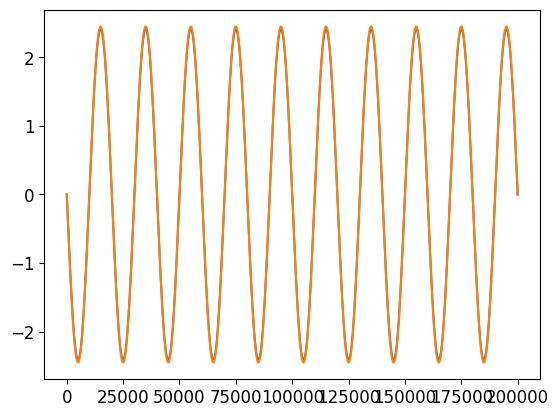

In [7]:
for v in v_cell_ext[0:2]:
    plt.plot(v)
# plt.xlim(1000,20000)
# plt.ylim(2.2,2.6)

In [8]:
print(np.array(getSecsPos(cell, secList)[0]).mean(axis=-1),-1*np.array(getSecsPos(cell, secList)[1]).mean(axis=-1),np.array(getSecsPos(cell, secList)[0]).mean(axis=-1))

[1000. 1000. 1000.] [990.  942.5 867.5] [1000. 1000. 1000.]


soma 0
dend1 1
dend2 2
[100. 100. 100.] [ 90.   42.5 -32.5] [0. 0. 0.]
soma 0
dend1 1
dend2 2
[400. 400. 400.] [390.  342.5 267.5] [0. 0. 0.]
soma 0
dend1 1
dend2 2
[700. 700. 700.] [690.  642.5 567.5] [0. 0. 0.]
soma 0
dend1 1
dend2 2
[1000. 1000. 1000.] [990.  942.5 867.5] [0. 0. 0.]


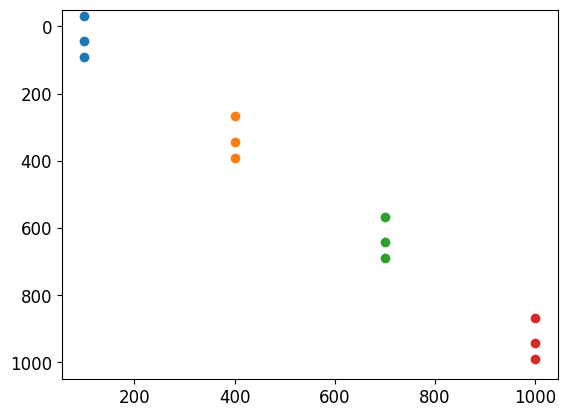

In [9]:
#Add extracellular stim
for c,metype in enumerate(sim.net.cells):
    if 'presyn' not in metype.tags['pop']:
        v_cell_ext, cell = make_extracellular_stimuli(acs_params, sim.net.cells[c],secList)
        plt.plot(np.array(getSecsPos(cell, secList)[0]).mean(axis=-1),-1*np.array(getSecsPos(cell, secList)[1]).mean(axis=-1),'o')
        plt.ylim(1050,-50)
        print(np.array(getSecsPos(cell, secList)[0]).mean(axis=-1),-1*np.array(getSecsPos(cell, secList)[1]).mean(axis=-1),np.array(getSecsPos(cell, secList)[2]).mean(axis=-1))

Plotting 2D representation of network cell locations and connections...


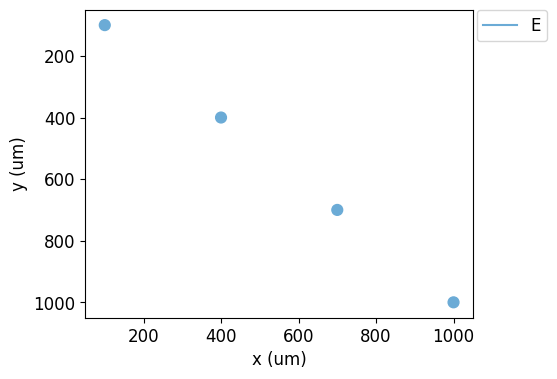

(<Figure size 500x400 with 1 Axes>,
 {'include': ['allCells'],
  'posX': [100, 400, 700, 1000],
  'posY': [100, 400, 700, 1000],
  'posXpre': [],
  'posXpost': [],
  'posYpre': [],
  'posYpost': []})

In [10]:
sim.analysis.plot2Dnet(figSize=(5, 4), fontSize=12)